**<FONT COLOR="blue">Maquina de soporte de vectores (SVM)</FONT>**

**INTRODUCCION**

Las Support Vector Machines o Máquinas de Soporte Vectorial son una serie de algoritmos de aprendizaje supervisado desarrollados en la década de los 90 por Vladimir Vapnik
junto a su equipo en los laboratorios AT&T. Si bien originariamente se desarrollaron como un método de clasificación binaria, su aplicación se ha ido extendiendo a problemas de clasificación múltiple y regresión

**REGRESION VECTORIAL DE SOPORTE (SVR)**

Es muy común designarlas por el acrónimo SVR (del inglés Support Vector Regression).  Dado que la teoría de las SVM de Regresión se construyó a partir de modificaciones de la SVM de clasificación, Se apoyan en el mismo fundamento de las clásicas SVM de clasificación, pero en este caso el hiperplano busca ajustarse lo mejor posible a las muestras de entrenamiento.

Presenta la ventaja frente a otros métodos de análisis de ser menos sensible frente a los valores atípicos. Además, la formulación de la SVR se basa en el criterio de máximo margen.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

La librería numpy está especializada en el cálculo numérico y el análisis de datos, especialmente para un gran volumen de datos. Incorporando arrays que permiten representar
colecciones de datos. La libreria pandas proporciona herramientas que permiten: leer y escribir datos en diferentes formatos, ademas de seleccionar y filtrar tablas de datos, fusionar y unir datos.

La libreria Matplotlib está especializada en la creación de gráficos, y pyplot es un módulo de este, que propone funciones tales como líneas, imágenes o textos a los ejes de los gráficos. La librería Seaborn permite generar gráficos, esta librería es una versión extendida de Matplotlib. La biblioteca scikit-learn contiene muchas herramientas eficientes para aprendizaje automático y modelado estadístico, incluyendo clasificación, regresión, agrupación, y reducción de dimensionalidad.

In [ ]:
datos = pd.read_csv("boston.csv",sep=",")
datos.head(3)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [ ]:
datos.shape

(506, 15)

La base de datos contiene 15 variables y 506 observaciones, entre ellas definimos a la variable medv comom la variable dependiente y a las demas como independientes. existen dos variables que excluiremos del estudio Unnamed y chas

In [ ]:
# eliminando las variables Unnmed y chas
del datos['Unnamed: 0']
del datos['chas']
#datos = datos.drop(["Unnamed: 0","chas"])

In [ ]:
# resumen de las variables
datos.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


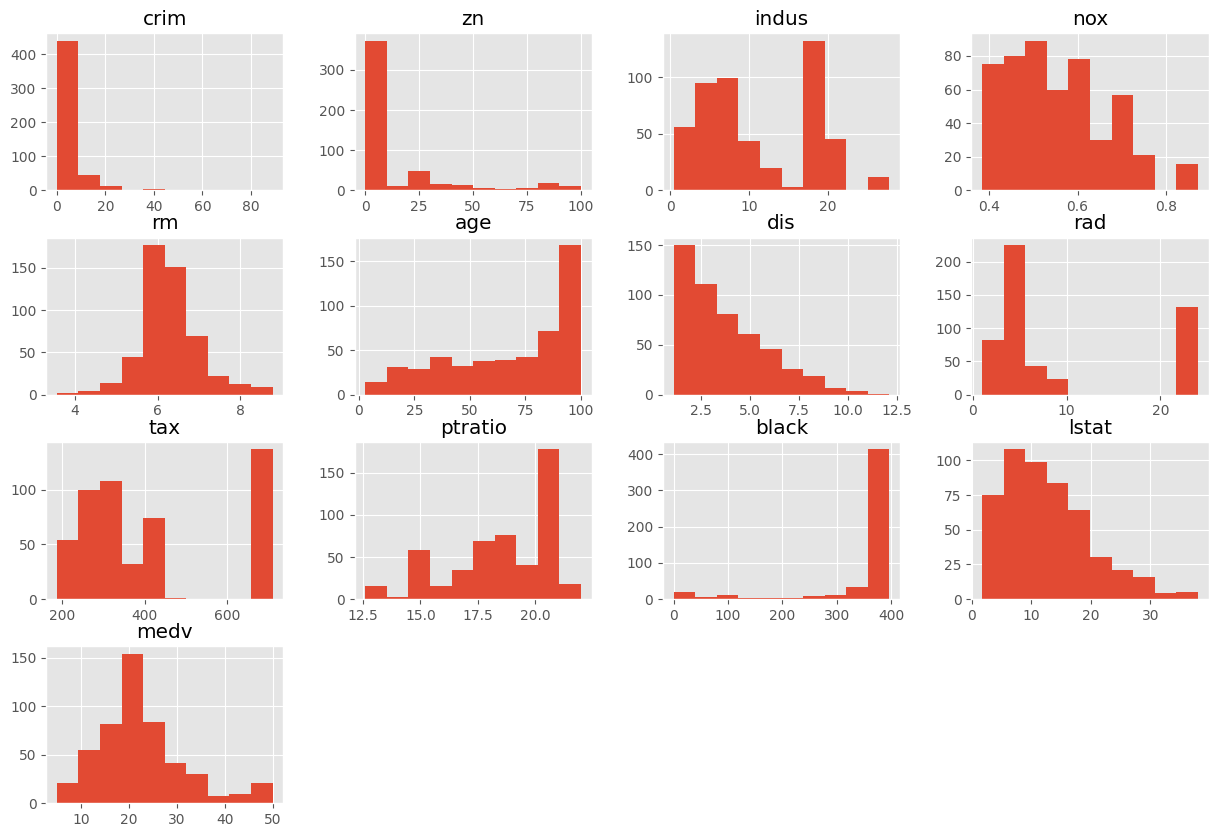

In [ ]:
# Gráfico de Histograma
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as ptl
fig=ptl.figure(figsize=(15,10)) # tamaño de figura
ax=fig.gca()#agranda la figura
datos.hist(ax=ax)
ptl.show()

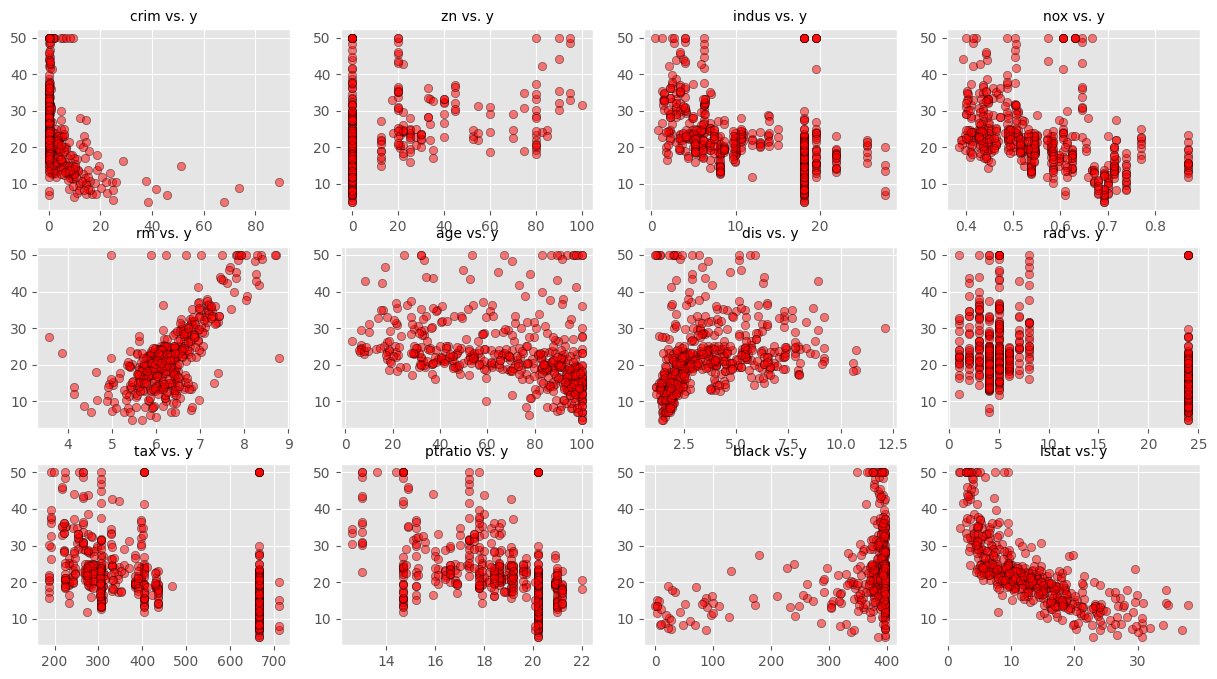

In [ ]:
# Gráfico de dispersión
fig,ax = plt.subplots(3,4,figsize=(15,8))
ax = ax.ravel()
for i in range(12):
    ax[i].scatter(datos[datos.columns[i]],datos['medv'],edgecolor='k',color='red',alpha=0.50)
    ax[i].set_title(f"{datos.columns[i]} vs. y",fontsize=10)
    ax[i].grid(True)
plt.show()

Se muestra el grafico de dispersión de los datos de las variables explicativas frente a la variable dependiente.

In [ ]:
# definimos la variable dependiente
X = datos.drop(columns = 'medv')
Y = datos['medv']

# separamos la data en train y test
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR

**MODELO SVR con kernel lineal**

In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer
# probando valores de C
print ('C',' RMSE',' MSE')
for i in range (1, 50, 2):
  svmlinear = SVR(kernel = 'linear', C=i)
  svmlinear.fit(X_train, y_train)
  svmlinearpred = svmlinear.predict(X = X_test)
  rmse = mean_squared_error(
      y_true  = y_test,
      y_pred  = svmlinearpred,
      squared = False
      )
  mse = rmse*rmse
  print(i, f"  {rmse:.4f}", f"  {mse:.4f}" )

C  RMSE  MSE
1   4.9661   24.6621
3   4.8843   23.8569
5   4.7778   22.8276
7   4.7160   22.2408
9   4.8975   23.9853
11   4.9020   24.0297
13   4.8792   23.8069
15   4.9929   24.9290
17   4.8511   23.5331
19   4.8864   23.8767
21   4.7465   22.5294
23   4.7304   22.3766
25   4.7722   22.7736
27   4.9673   24.6738
29   5.2756   27.8317
31   4.9694   24.6951
33   4.9967   24.9669
35   4.8903   23.9153
37   4.7489   22.5518
39   5.0806   25.8126
41   4.7650   22.7055
43   5.3647   28.7796
45   4.9087   24.0953
47   5.5103   30.3629
49   5.0645   25.6489


Para encontrar el mejor modelo con kernel lineal, se consideró diferentes valores para la constante C, de manera que, con un valor de 7, se tiene una raiz del error cuadrático medio de 4.7160, el valor más bajo.

In [ ]:
# Modelo
svmlinear = SVR(kernel = 'linear', C=7)
svmlinear.fit(X_train, y_train)
#SVR(C=7, kernel='linear')

SVR(C=7, kernel='linear')

In [ ]:
# Prediccion
svmlinearpred = svmlinear.predict(X = X_test)
svmlinearpred

array([24.14023937, 23.59266264, 12.26164273, 21.49596638, 14.43498765,
       25.81563945, 19.00207181, 17.66863662, 24.1073416 , 31.30261653,
       13.74918396, 21.51099022, 22.72987385, 15.39387777, 18.7674415 ,
       22.76560769, 11.50661618, 17.39938172, 19.21341392,  6.90728536,
       30.89685519, 17.88811071, 16.98099416, 19.03970326, 27.34070779,
       20.61097607, 19.41407265, 25.12217224, 23.49971143, 19.65113177,
       20.44580709, 14.70145323, 18.96755966, 17.75094079, 24.00763   ,
       17.95579633, 26.14209571, 21.27742496,  6.30062778,  5.71150403,
        7.53141071, 20.86142342, 36.92049108, 30.66258612, 16.9613481 ,
       27.86107406, 21.19954587, 37.8173944 , 16.24256439, 26.57225638,
       16.33146214, 32.82065043, 26.28877926, 24.10384816, 26.32271126,
       31.80348148,  7.20553587, 29.96442269, 26.17489517, 21.42517268,
       33.71577273, 17.23036748, 25.07765332, 32.10477985, 11.61570349,
       20.73763839, 34.03822528, 17.22280572, 35.04875921, 36.98

In [ ]:
# Error de raíz cuadrada media (RMSE)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = svmlinearpred,
squared = False
)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 4.716016884542198


In [ ]:
# Error cuadrático medio (MSE)
mse = rmse*rmse
print(f"El error (mse) de test es: {mse}")

El error (mse) de test es: 22.240815255287103


In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Aggiungi la linea x = y
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Prices")
plt.show()

**MODELO SVR con kernel polinomial**

In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer
#probando valores de C
print ('C', 'RMSE', 'MSE')
for i in np.arange (0.001, 0.1, 0.002):
  svmpoly = SVR(kernel = 'poly', C=i, gamma="auto", degree=2)
  svmpoly.fit(X_train, y_train)
  svmpolypred = svmpoly.predict(X = X_test)
  rmse = mean_squared_error(
      y_true  = y_test,
      y_pred  = svmpolypred,
      squared = False
      )
  mse = rmse*rmse
  print(i, f"  {rmse:.4f}", f"  {mse:.4f}" )

C RMSE MSE
0.001   4.5151   20.3864
0.003   4.2766   18.2895
0.005   4.1119   16.9076
0.007   4.1889   17.5470
0.009000000000000001   4.5727   20.9097
0.011   4.2729   18.2573
0.013000000000000001   4.0632   16.5096
0.015   4.6029   21.1867
0.017   4.6806   21.9079
0.019000000000000003   5.8762   34.5300
0.021   5.2497   27.5597
0.023   7.4641   55.7134
0.025   5.9834   35.8010
0.027000000000000003   8.2789   68.5401
0.029   7.2322   52.3045
0.031   7.7187   59.5778
0.033   7.1651   51.3387
0.035   9.0233   81.4195
0.037000000000000005   6.1940   38.3656


Para encontrar el mejor modelo con kernel polinomial, se consideró diferentes valores para la constante C, de manera que, con un valor de 0.13, se tiene un error cuadrático
medio de 4.0632, el valor más bajo.

In [ ]:
# Modelo
svmpoly = SVR(kernel="poly", C=0.13, gamma=0.1, degree=2)
svmpoly.fit(X_train, y_train)

In [ ]:
# Prediccion
svmpolypred = svmpoly.predict(X = X_test)
datapredict["svmpolypred"]=svmpolypred
datapredict

In [ ]:
# Error de raíz cuadrada media (RMSE)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = svmpolypred,
        squared = False
)
print(f"El error (rmse) de test es: {rmse}")
El error (rmse) de test es: 0.1626781106134118

In [ ]:
# Error cuadrático medio (MSE)
mse = rmse*rmse
print(f"El error (mse) de test es: {mse}")
E l error (mse) de test es: 0.026464167672749447

**MODELO SVR con kernel gaussiano**

In [ ]:
#probando valores de C
print ('C','RMSE','MSE')
for i in range (2, 15,1):
  svmrbf = SVR(kernel = 'rbf',C=i, gamma=1, epsilon=1)
  svmrbf.fit(X_train, y_train)
  svmrbfpred = svmrbf.predict(X = X_test)rmse = mean_squared_error(
      y_true  = y_test,
      y_pred  = svmrbfpred,
      squared = False
      )
  mse = rmse*rmse
  print(f"{i:.4f}", f"  {rmse:.4f}", f"  {mse:.4f}" )

In [ ]:
#probando valores de Gamma

print ('Gamma','    RMSE','    MSE')

for i in np.arange (0.0001, 0.01, 0.0002):
  svmrbf = SVR(kernel = 'rbf',C=10, gamma=i, epsilon=1)
  svmrbf.fit(X_train, y_train)

  svmrbfpred = svmrbf.predict(X = X_test)
  rmse = mean_squared_error(
          y_true  = y_test,
          y_pred  = svmrbfpred,
          squared = False
        )
  mse = rmse*rmse
  print(f"{i:.4f}", f"  {rmse:.4f}", f"  {mse:.4f}" )

In [ ]:
#probando valores de Epsilon

print ('Epsilon','    RMSE','    MSE')

for i in np.arange (0.00001, 0.65, 0.01):
  svmrbf = SVR(kernel = 'rbf',C=10, gamma=0.0019, epsilon=i)
  svmrbf.fit(X_train, y_train)

  svmrbfpred = svmrbf.predict(X = X_test)
  rmse = mean_squared_error(
          y_true  = y_test,
          y_pred  = svmrbfpred,
          squared = False
        )
  mse = rmse*rmse
  print(f"{i:.4f}", f"  {rmse:.4f}", f"  {mse:.4f}" )
==============================================================

In [ ]:
#Modelo
svmrbf = SVR(kernel = 'rbf',C=10, gamma=0.0019, epsilon=0.4)
svmrbf.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = svr.predict(X_test) # ojo ver escalado

In [ ]:
# Predicción
svmrbfpred = svmrbf.predict(X = X_test)
datapredict["svmrbfpred"]=svmrbfpred
datapredict

In [ ]:
# Error de raíz cuadrada media (RMSE)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = svmrbfpred,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")
El error (rmse) de test es: 0.977003363633753

# Error cuadrático medio (MSE)
mse = rmse*rmse
print(f"El error (mse) de test es: {mse}")
El error (mse) de test es: 0.9545355725516673

**MODELO SVR con kernel sigmoidal**

In [ ]:
#probando valores de C

print ('C','    RMSE','    MSE')

for i in range (1, 15,1):
  svmsigmoid = SVR(kernel = 'sigmoid',C=i, gamma=1)
  svmsigmoid.fit(X_train, y_train)

  svmsigmoidpred = svmsigmoid.predict(X = X_test)
  rmse = mean_squared_error(
          y_true  = y_test,
          y_pred  = svmsigmoidpred,
          squared = False
        )
  mse = rmse*rmse
  print(f"{i:.0f}", f"  {rmse:.4f}", f"  {mse:.4f}" )

In [ ]:
# Modelo
svmsigmoid = SVR(kernel = 'sigmoid',C=5, gamma=1)
svmsigmoid.fit(X_train, y_train)
SVR(C=5, gamma=1, kernel='sigmoid')

In [ ]:
# Predicción
svmsigmoidpred = svmsigmoid.predict(X = X_test)
datapredict["svmsigmoidpred"]=svmsigmoidpred
datapredict

In [ ]:
# Error de raíz cuadrada media (RMSE)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = svmsigmoidpred,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

# Error cuadrático medio (MSE)
mse = rmse*rmse
print(f"El error (mse) de test es: {mse}")

Otro script

In [ ]:
C=1e3
svr_lin = SVR(kernel="linear", C=C)
svr_rbf = SVR(kernel="rbf", C=C, gamma=0.1)
svr_pol = SVR(kernel="poly", C=C, degree=3)

In [ ]:
y_lin = svr_lin.fit(X_train,Y_train).predict(X)
y_rbf = svr_rbf.fit(X_train,Y_train).predict(X)
y_pol = svr_pol.fit(X_train,Y_train).predict(X)

In [ ]:
# Test score
svr_lin.score(X_test,Y_test)

In [ ]:
svr_rbf.score(X_test,Y_test)

In [ ]:
svr_pol.score(X_test,Y_test)

In [ ]:
# Linear Regresion
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,Y_train)
linear.score(X_test,Y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(Y_test,svr_lin.predict(X_test))))
#print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(Y_test,svr_lin.predict(X_test))))

In [ ]:
from sklearn.metrics import mean_squared_error
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(Y_test,svr_rbf.predict(X_test))))
#print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(Y_test,svr_rbf.predict(X_test))))

In [ ]:
from sklearn.metrics import mean_squared_error
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(Y_test,svr_pol.predict(X_test))))
#print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(Y_test,svr_pol.predict(X_test))))

In [ ]:
#5 Predicting a new result
#y_pred = svr_lin.predict(6.5)